### 왜 시각화가 중요한가?
* 숫자로 보이지 않는 패턴을 발견
* 비전문가도 이해 가능
* 빠른 인사이트 도출로 의사결정을 할 수 있음

### Matplotlib 구조
* Figure: 전체 캔버스
* Axes: 실제 그래프가 그려지는 영역
* 플롯 종류: 선 그래프, 막대 그래프, 산점도, 히스토그램

### 좋은 시각화 원칙
* 명확한 제목과 축 레이블
* 적절한 색상 선택
* 불필요한 요소 제거
* 데이터-잉크 비율 최대화

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import matplotlib as mpl

# 한글 폰트 설정 (선택사항)
mpl.rcParams['font.family'] = 'AppleGothic'
mpl.rcParams['axes.unicode_minus'] = False

=== 기본 선 그래프 ===


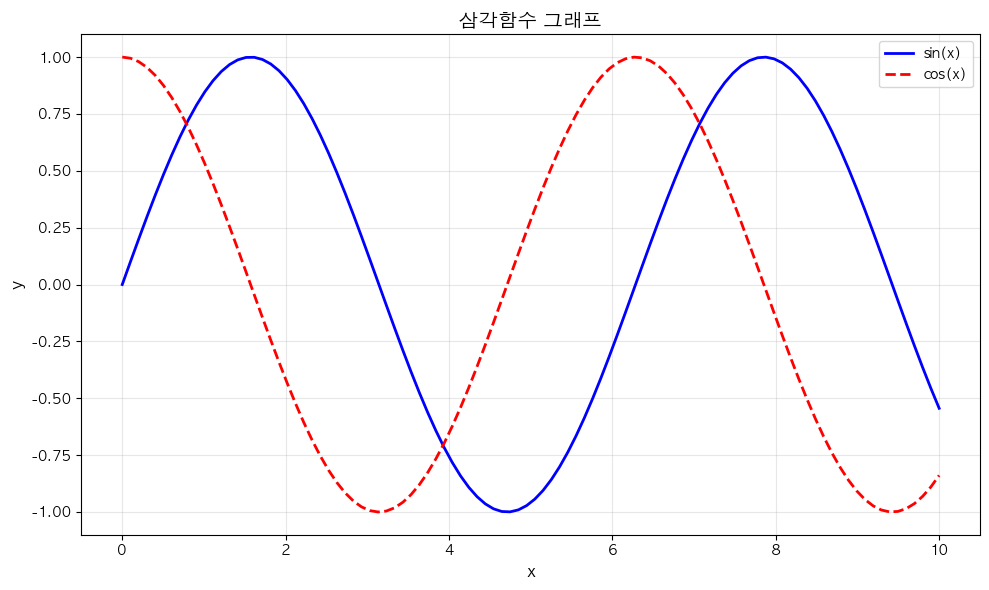

In [7]:
# 1. 기본 플롯
print("=== 기본 선 그래프 ===")

x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='sin(x)', linewidth=2, color='blue')
plt.plot(x, y2, label='cos(x)', linewidth=2, color='red', linestyle='--')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('삼각함수 그래프', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


=== 서브플롯 ===


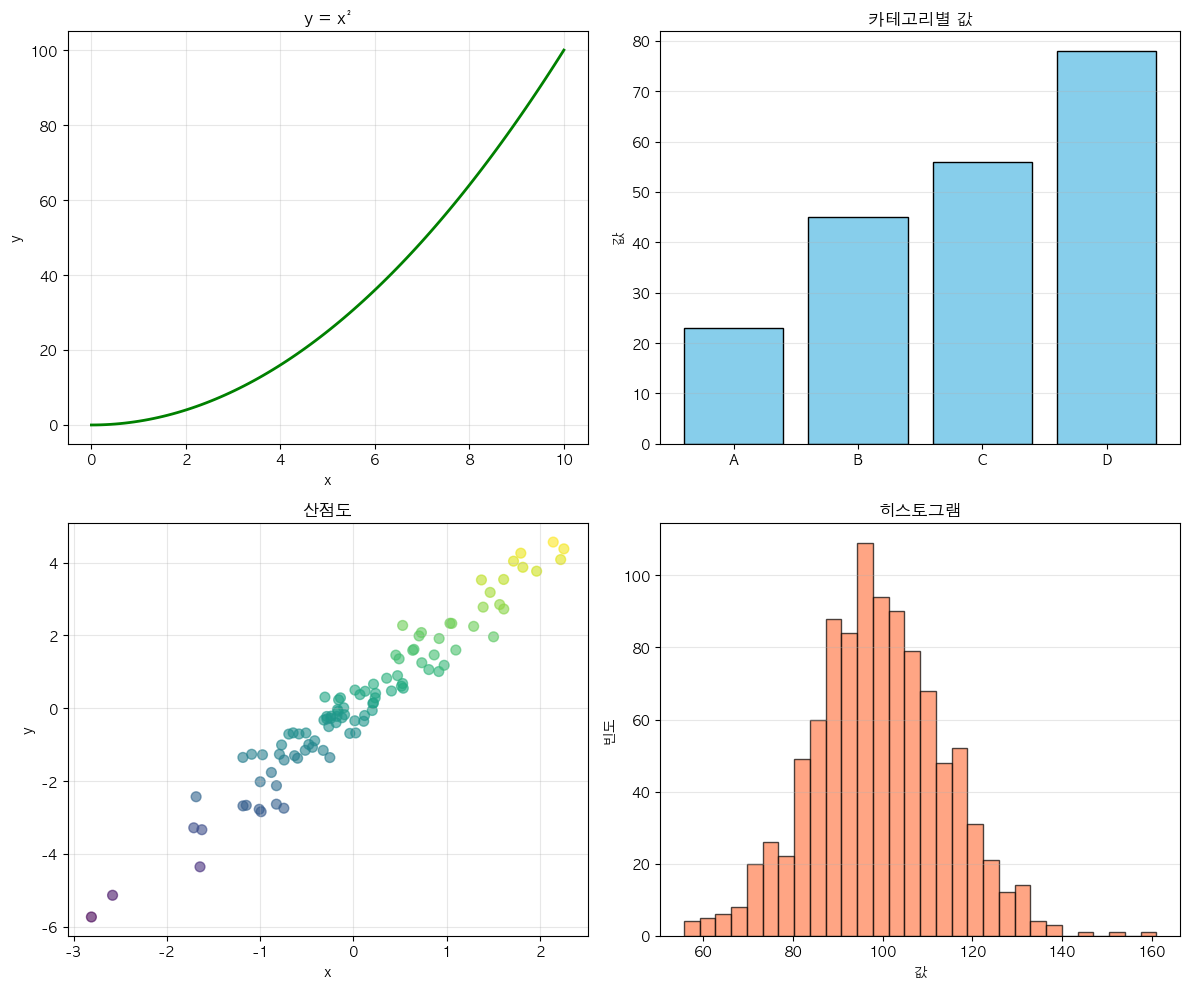

In [8]:
# 2. 여러 서브플롯
print("\n=== 서브플롯 ===")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# (0,0) 선 그래프
x = np.linspace(0, 10, 100)
axes[0, 0].plot(x, x**2, color='green', linewidth=2)
axes[0, 0].set_title('y = x²')
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('y')
axes[0, 0].grid(alpha=0.3)

# (0,1) 막대 그래프
categories = ['A', 'B', 'C', 'D']
values = [23, 45, 56, 78]
axes[0, 1].bar(categories, values, color='skyblue', edgecolor='black')
axes[0, 1].set_title('카테고리별 값')
axes[0, 1].set_ylabel('값')
axes[0, 1].grid(alpha=0.3, axis='y')

# (1,0) 산점도
x = np.random.randn(100)
y = 2*x + np.random.randn(100)*0.5
axes[1, 0].scatter(x, y, alpha=0.6, c=y, cmap='viridis', s=50)
axes[1, 0].set_title('산점도')
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('y')
axes[1, 0].grid(alpha=0.3)

# (1,1) 히스토그램
data = np.random.normal(100, 15, 1000)
axes[1, 1].hist(data, bins=30, alpha=0.7, color='coral', edgecolor='black')
axes[1, 1].set_title('히스토그램')
axes[1, 1].set_xlabel('값')
axes[1, 1].set_ylabel('빈도')
axes[1, 1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


=== 확률분포 시각화 ===


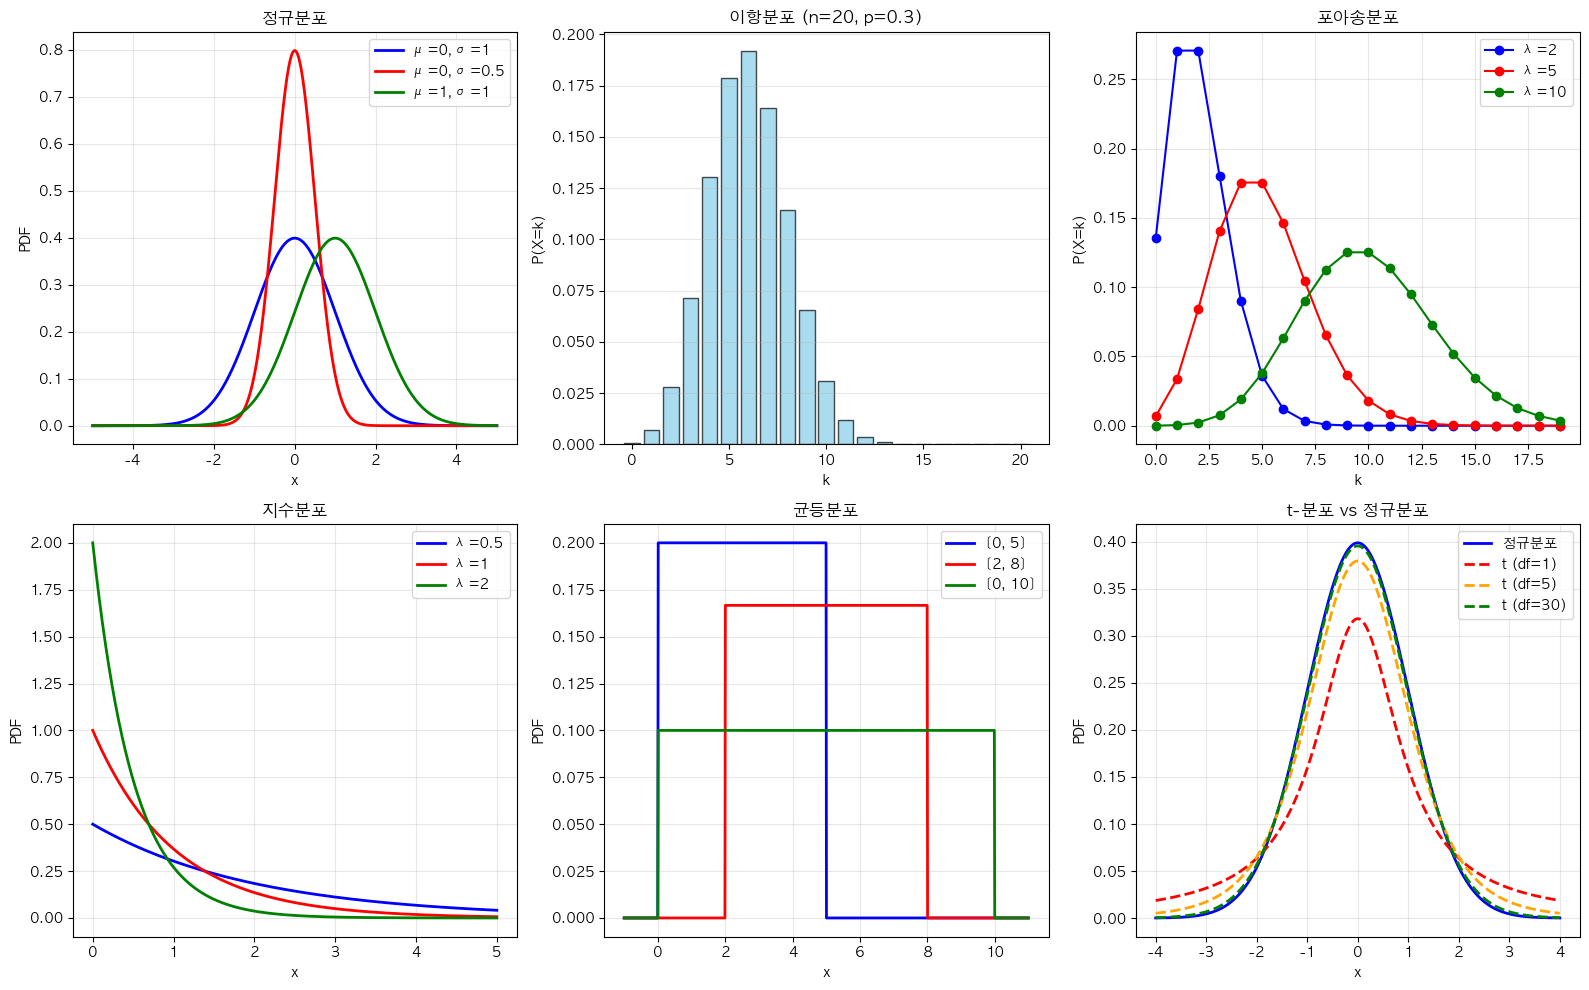

In [9]:
# 3. 확률분포 시각화
print("\n=== 확률분포 시각화 ===")

fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# 정규분포 - 여러 파라미터
ax = axes[0, 0]
x = np.linspace(-5, 5, 1000)
for mu, sigma, color in [(0, 1, 'blue'), (0, 0.5, 'red'), (1, 1, 'green')]:
    y = stats.norm(mu, sigma).pdf(x)
    ax.plot(x, y, label=f'μ={mu}, σ={sigma}', linewidth=2, color=color)
ax.set_title('정규분포')
ax.set_xlabel('x')
ax.set_ylabel('PDF')
ax.legend()
ax.grid(alpha=0.3)

# 이항분포
ax = axes[0, 1]
n, p = 20, 0.3
x = np.arange(0, n+1)
pmf = stats.binom(n, p).pmf(x)
ax.bar(x, pmf, alpha=0.7, color='skyblue', edgecolor='black')
ax.set_title(f'이항분포 (n={n}, p={p})')
ax.set_xlabel('k')
ax.set_ylabel('P(X=k)')
ax.grid(alpha=0.3, axis='y')

# 포아송분포
ax = axes[0, 2]
lambdas = [2, 5, 10]
x = np.arange(0, 20)
for lam, color in zip(lambdas, ['blue', 'red', 'green']):
    pmf = stats.poisson(lam).pmf(x)
    ax.plot(x, pmf, 'o-', label=f'λ={lam}', color=color, markersize=6)
ax.set_title('포아송분포')
ax.set_xlabel('k')
ax.set_ylabel('P(X=k)')
ax.legend()
ax.grid(alpha=0.3)

# 지수분포
ax = axes[1, 0]
x = np.linspace(0, 5, 1000)
for lam, color in [(0.5, 'blue'), (1, 'red'), (2, 'green')]:
    y = stats.expon(scale=1/lam).pdf(x)
    ax.plot(x, y, label=f'λ={lam}', linewidth=2, color=color)
ax.set_title('지수분포')
ax.set_xlabel('x')
ax.set_ylabel('PDF')
ax.legend()
ax.grid(alpha=0.3)

# 균등분포
ax = axes[1, 1]
x = np.linspace(-1, 11, 1000)
for a, b, color in [(0, 5, 'blue'), (2, 8, 'red'), (0, 10, 'green')]:
    y = stats.uniform(a, b-a).pdf(x)
    ax.plot(x, y, label=f'[{a}, {b}]', linewidth=2, color=color)
ax.set_title('균등분포')
ax.set_xlabel('x')
ax.set_ylabel('PDF')
ax.legend()
ax.grid(alpha=0.3)

# t-분포 vs 정규분포
ax = axes[1, 2]
x = np.linspace(-4, 4, 1000)
ax.plot(x, stats.norm(0, 1).pdf(x), label='정규분포', linewidth=2, color='blue')
for df, color in [(1, 'red'), (5, 'orange'), (30, 'green')]:
    y = stats.t(df).pdf(x)
    ax.plot(x, y, label=f't (df={df})', linewidth=2, color=color, linestyle='--')
ax.set_title('t-분포 vs 정규분포')
ax.set_xlabel('x')
ax.set_ylabel('PDF')
ax.legend()
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


=== 실전: 월별 매출 분석 ===


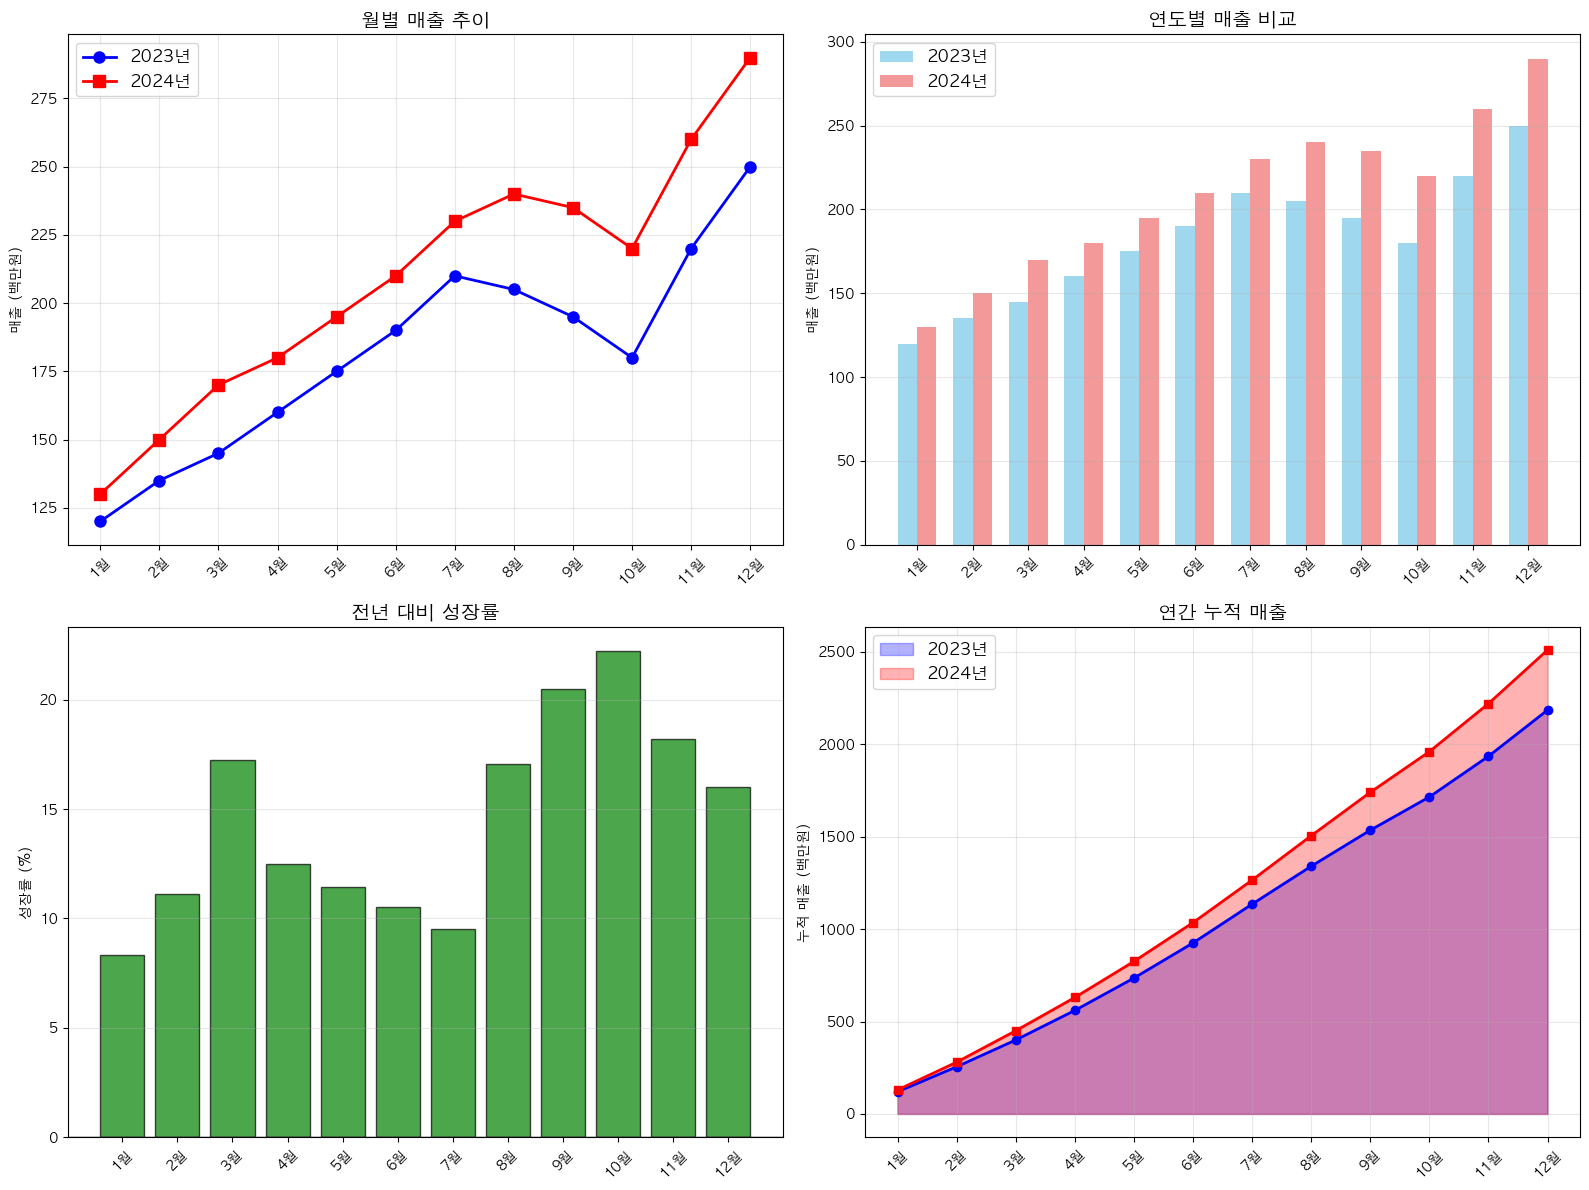


2023년 총 매출: 2185백만원
2024년 총 매출: 2510백만원
총 성장률: 14.9%


In [10]:
# 4. 실전 예제: 매출 데이터 시각화
print("\n=== 실전: 월별 매출 분석 ===")

# 가상 데이터
months = ['1월', '2월', '3월', '4월', '5월', '6월',
          '7월', '8월', '9월', '10월', '11월', '12월']
sales_2023 = [120, 135, 145, 160, 175, 190, 210, 205, 195, 180, 220, 250]
sales_2024 = [130, 150, 170, 180, 195, 210, 230, 240, 235, 220, 260, 290]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 선 그래프 - 월별 추이
ax = axes[0, 0]
x = np.arange(len(months))
ax.plot(x, sales_2023, 'o-', label='2023년', linewidth=2, markersize=8, color='blue')
ax.plot(x, sales_2024, 's-', label='2024년', linewidth=2, markersize=8, color='red')
ax.set_xticks(x)
ax.set_xticklabels(months, rotation=45)
ax.set_ylabel('매출 (백만원)')
ax.set_title('월별 매출 추이', fontsize=14, fontweight='bold')
ax.legend(fontsize=12)
ax.grid(alpha=0.3)

# 막대 그래프 - 비교
ax = axes[0, 1]
width = 0.35
ax.bar(x - width/2, sales_2023, width, label='2023년', alpha=0.8, color='skyblue')
ax.bar(x + width/2, sales_2024, width, label='2024년', alpha=0.8, color='lightcoral')
ax.set_xticks(x)
ax.set_xticklabels(months, rotation=45)
ax.set_ylabel('매출 (백만원)')
ax.set_title('연도별 매출 비교', fontsize=14, fontweight='bold')
ax.legend(fontsize=12)
ax.grid(alpha=0.3, axis='y')

# 성장률
ax = axes[1, 0]
growth_rate = [(s24 - s23) / s23 * 100 for s23, s24 in zip(sales_2023, sales_2024)]
colors = ['green' if g > 0 else 'red' for g in growth_rate]
ax.bar(x, growth_rate, alpha=0.7, color=colors, edgecolor='black')
ax.axhline(0, color='black', linewidth=1)
ax.set_xticks(x)
ax.set_xticklabels(months, rotation=45)
ax.set_ylabel('성장률 (%)')
ax.set_title('전년 대비 성장률', fontsize=14, fontweight='bold')
ax.grid(alpha=0.3, axis='y')

# 누적 매출
ax = axes[1, 1]
cumsum_2023 = np.cumsum(sales_2023)
cumsum_2024 = np.cumsum(sales_2024)
ax.fill_between(x, cumsum_2023, alpha=0.3, color='blue', label='2023년')
ax.fill_between(x, cumsum_2024, alpha=0.3, color='red', label='2024년')
ax.plot(x, cumsum_2023, 'o-', linewidth=2, color='blue')
ax.plot(x, cumsum_2024, 's-', linewidth=2, color='red')
ax.set_xticks(x)
ax.set_xticklabels(months, rotation=45)
ax.set_ylabel('누적 매출 (백만원)')
ax.set_title('연간 누적 매출', fontsize=14, fontweight='bold')
ax.legend(fontsize=12)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n2023년 총 매출: {sum(sales_2023)}백만원")
print(f"2024년 총 매출: {sum(sales_2024)}백만원")
print(f"총 성장률: {(sum(sales_2024)-sum(sales_2023))/sum(sales_2023)*100:.1f}%")

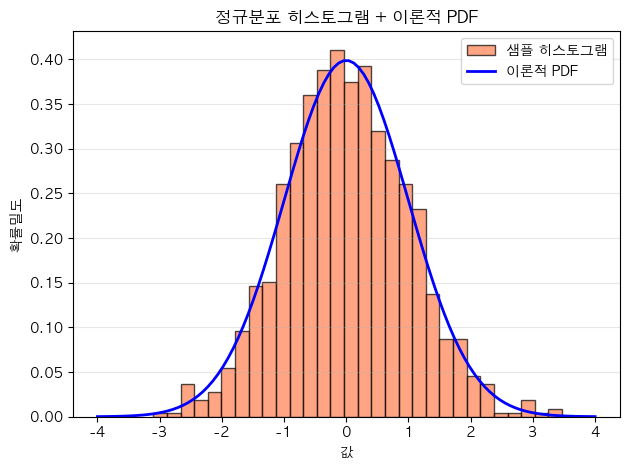

In [23]:
# 1. 정규분포에서 1000개 샘플을 생성하고, 히스토그램과 이론적 PDF를 같이 그려보세요.
from scipy.stats import norm

n_dist = np.random.normal(0, 1, 1000)

# density=True로 설정하면 히스토그램이 확률밀도로 정규화됩니다
plt.hist(n_dist, bins=30, density=True, alpha=0.7, color='coral', edgecolor='black', label='샘플 히스토그램')

# 이론적 PDF 그리기
x = np.linspace(-4, 4, 100)  # x축 범위 설정
# scipy.stats 사용
pdf = norm.pdf(x, 0, 1)  # 평균=0, 표준편차=1
plt.plot(x, pdf, 'b-', linewidth=2, label='이론적 PDF')

plt.title('정규분포 히스토그램 + 이론적 PDF')
plt.xlabel('값')
plt.ylabel('확률밀도')
plt.legend()
plt.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


=== 분기별 매출 분석 ===


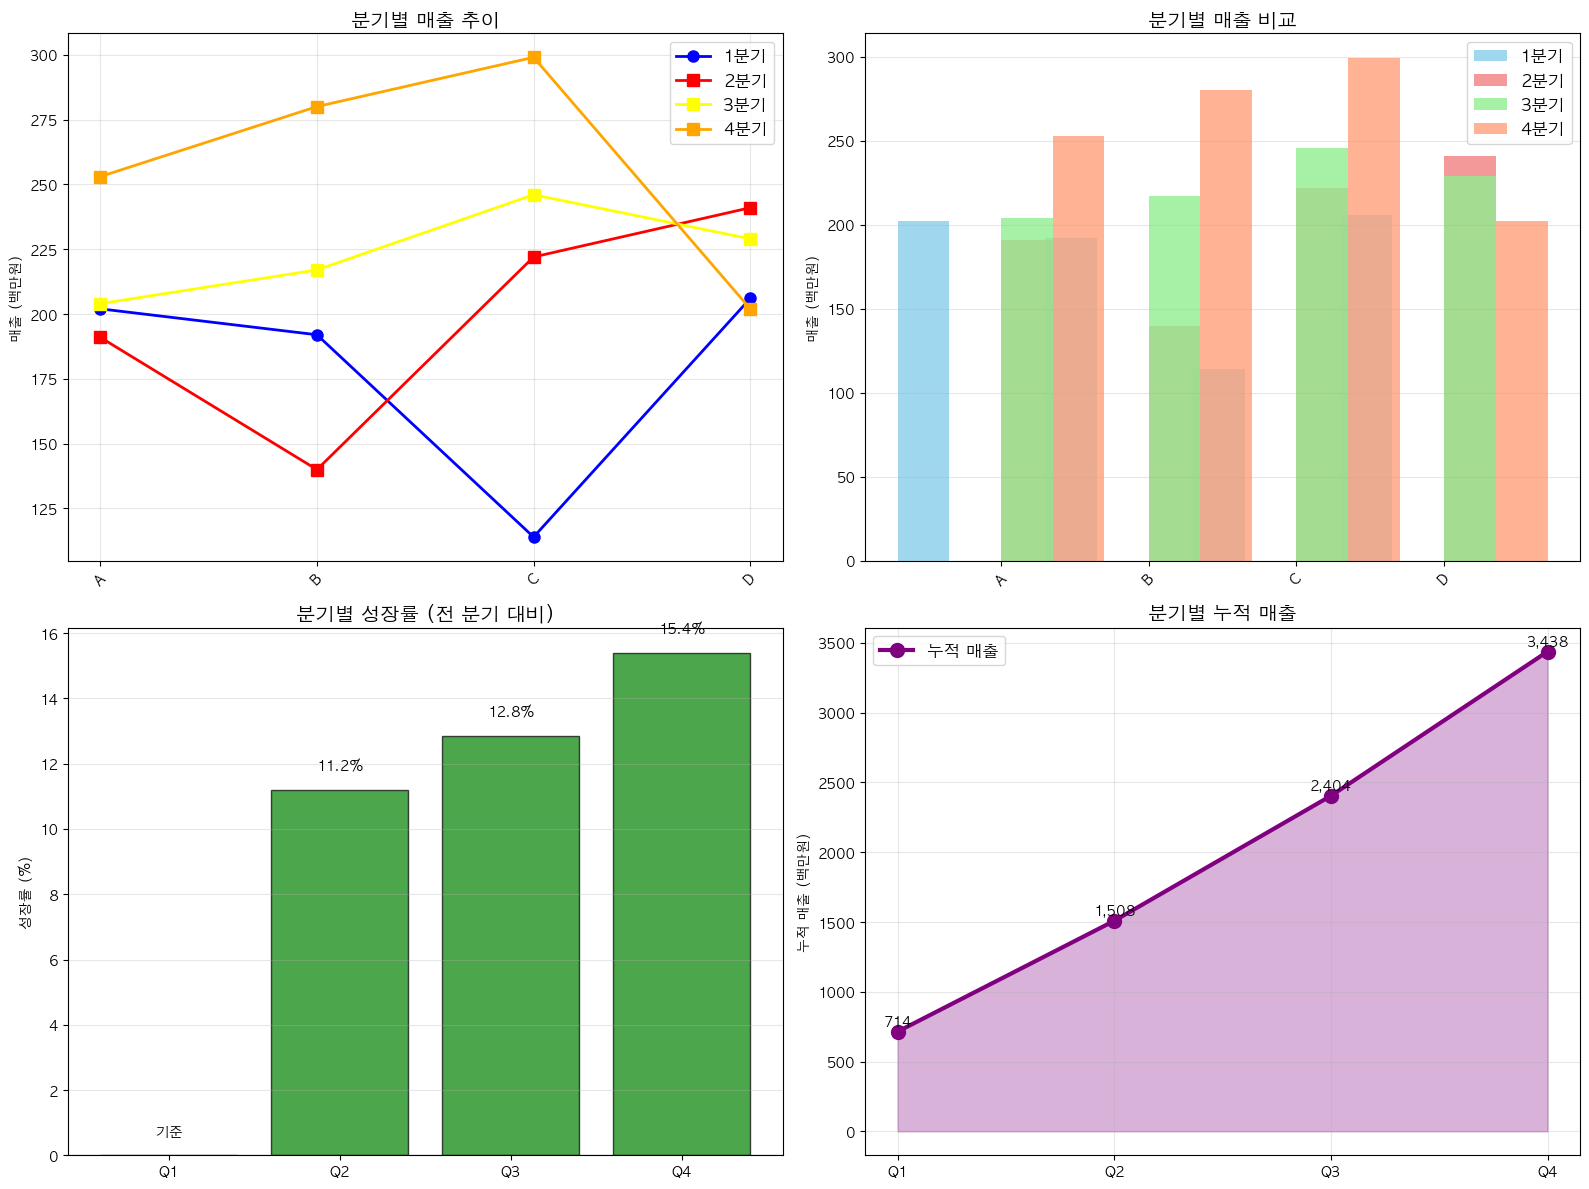

분기 총 매출: 714백만원
2분기 총 매출: 794백만원
3분기 총 매출: 896백만원
4분기 총 매출: 1034백만원

연간 총 매출: 3,438백만원
총 성장률 (Q1 대비 Q4): 44.82%
평균 분기별 성장률: 13.15%


In [28]:
# 2. 5개의 제품의 분기별 매출 데이터를 생성하고 다양한 방식으로 시각화

print("\n=== 분기별 매출 분석 ===")

# 가상 데이터
products = ['A', 'B', 'C', 'D']

np.random.seed(42)  # 재현성을 위한 시드 설정
sales_Q1 = np.random.randint(100, 250, size=4).tolist()
sales_Q2 = np.random.randint(120, 270, size=4).tolist()
sales_Q3 = np.random.randint(130, 280, size=4).tolist()
sales_Q4 = np.random.randint(150, 300, size=4).tolist()

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 선 그래프 - 월별 추이
ax = axes[0, 0]
x = np.arange(len(products))
ax.plot(x, sales_Q1, 'o-', label='1분기', linewidth=2, markersize=8, color='blue')
ax.plot(x, sales_Q2, 's-', label='2분기', linewidth=2, markersize=8, color='red')
ax.plot(x, sales_Q3, 's-', label='3분기', linewidth=2, markersize=8, color='yellow')
ax.plot(x, sales_Q4, 's-', label='4분기', linewidth=2, markersize=8, color='orange')
ax.set_xticks(x)
ax.set_xticklabels(products, rotation=45)
ax.set_ylabel('매출 (백만원)')
ax.set_title('분기별 매출 추이', fontsize=14, fontweight='bold')
ax.legend(fontsize=12)
ax.grid(alpha=0.3)

# 막대 그래프 - 비교
ax = axes[0, 1]
width = 0.35
ax.bar(x - 1.5 * width, sales_Q1, width, label='1분기', alpha=0.8, color='skyblue')
ax.bar(x + 0.5 * width, sales_Q2, width, label='2분기', alpha=0.8, color='lightcoral')
ax.bar(x + 0.5 * width, sales_Q3, width, label='3분기', alpha=0.8, color='lightgreen')
ax.bar(x + 1.5 * width, sales_Q4, width, label='4분기', alpha=0.8, color='lightsalmon')
ax.set_xticks(x)
ax.set_xticklabels(products, rotation=45)
ax.set_ylabel('매출 (백만원)')
ax.set_title('분기별 매출 비교', fontsize=14, fontweight='bold')
ax.legend(fontsize=12)
ax.grid(alpha=0.3, axis='y')

# 성장률 그래프
ax = axes[1, 0]
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
total_sales = [sum(sales_Q1), sum(sales_Q2), sum(sales_Q3), sum(sales_Q4)]

# 분기별 성장률 계산 (전 분기 대비)
growth_rates = [0]  # 1분기는 비교 대상이 없으므로 0
for i in range(1, len(total_sales)):
    growth = ((total_sales[i] - total_sales[i-1]) / total_sales[i-1]) * 100
    growth_rates.append(growth)

colors = ['gray' if rate == 0 else ('green' if rate > 0 else 'red') for rate in growth_rates]
bars = ax.bar(quarters, growth_rates, alpha=0.7, color=colors, edgecolor='black')

# 막대 위에 값 표시
for i, (bar, rate) in enumerate(zip(bars, growth_rates)):
    if i == 0:
        label = '기준'
    else:
        label = f'{rate:.1f}%'
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
            label, ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_ylabel('성장률 (%)')
ax.set_title('분기별 성장률 (전 분기 대비)', fontsize=14, fontweight='bold')
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax.grid(alpha=0.3, axis='y')

# 누적 매출 그래프
ax = axes[1, 1]
cumulative_sales = np.cumsum(total_sales)
ax.plot(quarters, cumulative_sales, 'o-', linewidth=3, markersize=10, color='purple', label='누적 매출')
ax.fill_between(range(len(quarters)), cumulative_sales, alpha=0.3, color='purple')

# 각 분기 누적 값 표시
for i, (q, cum) in enumerate(zip(quarters, cumulative_sales)):
    ax.text(i, cum + 20, f'{cum:,.0f}', ha='center', va='bottom', 
            fontsize=10, fontweight='bold')

ax.set_ylabel('누적 매출 (백만원)')
ax.set_title('분기별 누적 매출', fontsize=14, fontweight='bold')
ax.legend(fontsize=12)
ax.grid(alpha=0.3)


plt.tight_layout()
plt.show()

print(f"\1분기 총 매출: {sum(sales_Q1)}백만원")
print(f"2분기 총 매출: {sum(sales_Q2)}백만원")
print(f"3분기 총 매출: {sum(sales_Q3)}백만원")
print(f"4분기 총 매출: {sum(sales_Q4)}백만원")
print(f"\n연간 총 매출: {sum(total_sales):,}백만원")

# 총 성장률 (1분기 대비 4분기)
total_growth_rate = ((sum(sales_Q4) - sum(sales_Q1)) / sum(sales_Q1)) * 100
print(f"총 성장률 (Q1 대비 Q4): {total_growth_rate:.2f}%")

# 평균 분기별 성장률
avg_growth_rate = np.mean(growth_rates[1:])  # 0을 제외한 평균
print(f"평균 분기별 성장률: {avg_growth_rate:.2f}%")


=== 중심극한정리 시각화 ===


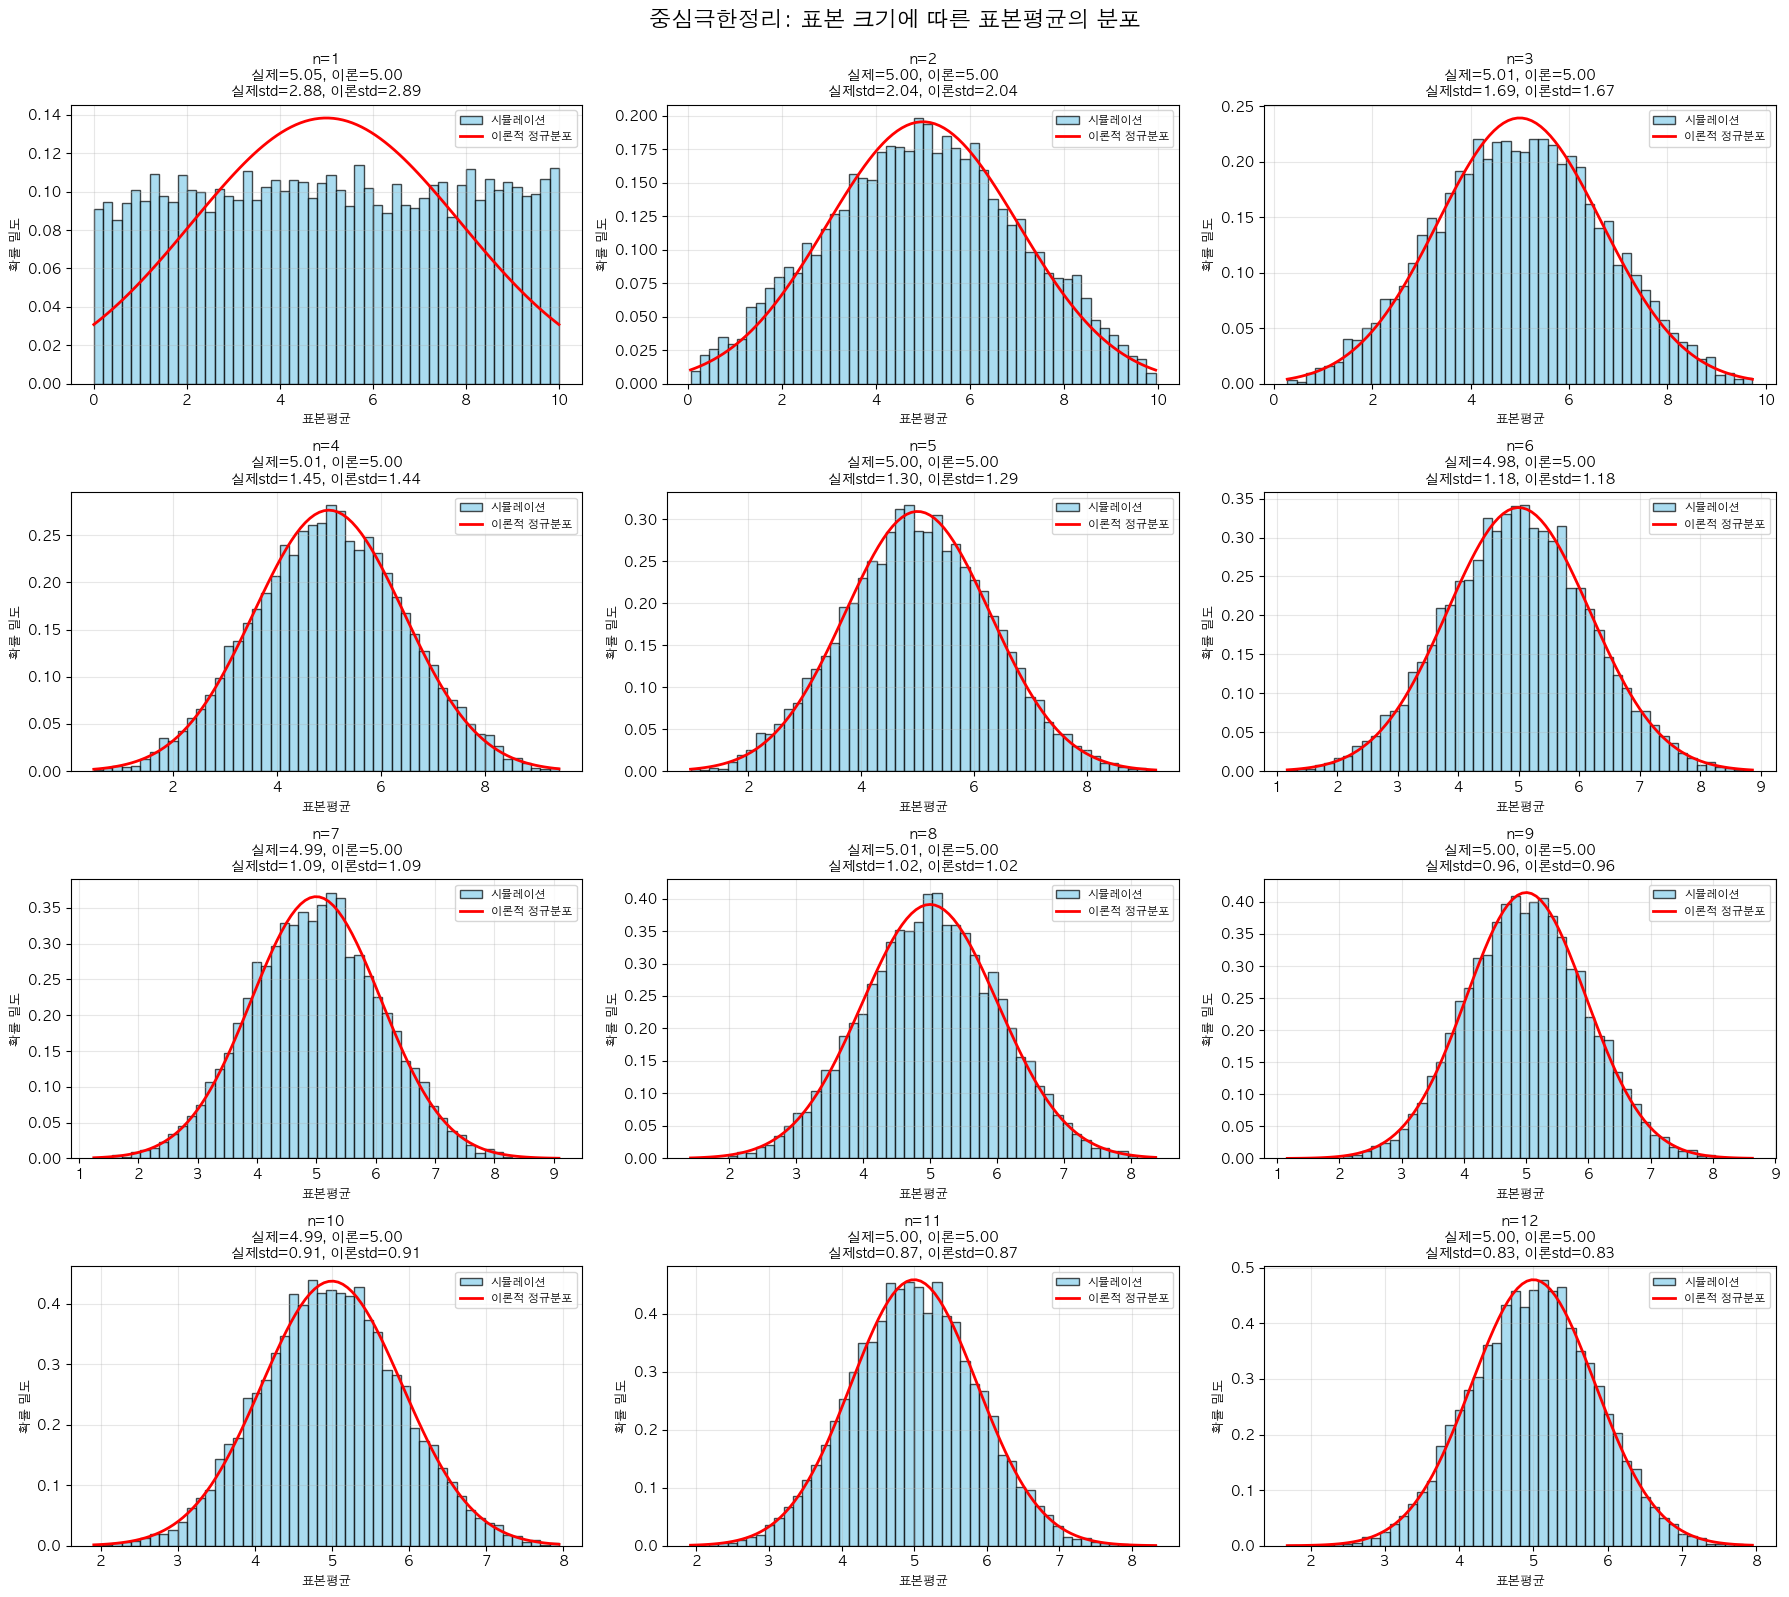

중심극한정리:
- 모집단: 균등분포 U(0, 10)
- 모집단 평균: 5
- 모집단 표준편차: 2.89
- 표본 크기가 커질수록 표본평균의 분포가 정규분포에 가까워집니다!


In [35]:
# 3. 중심극한정리를 시각화하되, 4x3 서브플롯으로 표본 크기 1~12를 모두 보여주세요.
print("\n=== 중심극한정리 시각화 ===")

fig, axes = plt.subplots(4, 3, figsize=(18, 16))
population = stats.uniform(0, 10)

# 균등분포의 이론적 평균과 표준편차
mu = 5  # 균등분포 U(0,10)의 평균
sigma = np.sqrt(100/12)  # 균등분포 U(0,10)의 표준편차 = sqrt((b-a)^2/12)

sample_sizes = list(range(1, 13))
n_simulations = 10000

for idx, n in enumerate(sample_sizes):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    # n개씩 샘플링하여 평균 계산을 10000번 반복
    sample_means = []
    for _ in range(n_simulations):
        # 모집단(균등분포)에서 n개의 샘플을 무작위로 추출
        sample = population.rvs(size=n)
        sample_means.append(np.mean(sample))
    
    sample_means = np.array(sample_means)
    
    # 히스토그램
    ax.hist(sample_means, bins=50, alpha=0.7, color='skyblue',
            edgecolor='black', density=True, label='시뮬레이션')
    
    # 이론적 정규분포 (중심극한정리)
    x = np.linspace(sample_means.min(), sample_means.max(), 100)
    theoretical_std = sigma / np.sqrt(n)  # 표본평균의 표준편차
    theoretical_pdf = stats.norm.pdf(x, mu, theoretical_std)
    ax.plot(x, theoretical_pdf, 'r-', linewidth=2, label='이론적 정규분포')
    
    # 제목과 레이블
    ax.set_xlabel('표본평균', fontsize=9)
    ax.set_ylabel('확률 밀도', fontsize=9)
    ax.set_title(f'n={n}\n실제={sample_means.mean():.2f}, 이론={mu:.2f}\n실제std={sample_means.std():.2f}, 이론std={theoretical_std:.2f}', 
                 fontsize=10)
    ax.legend(fontsize=8)
    ax.grid(alpha=0.3)

plt.suptitle('중심극한정리: 표본 크기에 따른 표본평균의 분포', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("중심극한정리:")
print(f"- 모집단: 균등분포 U(0, 10)")
print(f"- 모집단 평균: {mu}")
print(f"- 모집단 표준편차: {sigma:.2f}")
print(f"- 표본 크기가 커질수록 표본평균의 분포가 정규분포에 가까워집니다!")